### Introduction

The NetEase cloud music is a free streaming service, which is very popular in China. This report is to explore behaviors of the artists and the consumer of the streaming service. 

### EDA

In this section we will perform the exploratorive data analytics on the datasets. 
In total there are six csv files. 
1. creator_demographics
2. creator_stats
3. impression_data
4. mlog_demographics
5. mlog_stats
6. user_demographics

We will start with the creator tables. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from skimpy import skim

creator_dem = pd.read_csv('creator_demographics.csv')
print(creator_dem.describe())
creator_stat = pd.read_csv('creator_stats.csv')
print(creator_stat.describe())

       registeredMonthCnt       follows     followeds   creatorType  \
count        90534.000000  90534.000000  9.053400e+04  90534.000000   
mean            27.920129     39.775598  6.478139e+03      1.399043   
std             15.353343     91.180352  1.014181e+06     16.230853   
min              0.000000      0.000000  0.000000e+00      0.000000   
25%             16.000000      7.000000  3.000000e+00      0.000000   
50%             28.000000     17.000000  9.000000e+00      0.000000   
75%             38.000000     40.000000  3.200000e+01      0.000000   
max            608.000000   2546.000000  2.309376e+08    300.000000   

              level  
count  90534.000000  
mean       6.763128  
std        1.786054  
min        0.000000  
25%        6.000000  
50%        7.000000  
75%        8.000000  
max       10.000000  
                 dt  PushlishMlogCnt
count  2.572512e+06     2.572512e+06
mean   1.582608e+01     1.076236e-01
std    8.637209e+00     1.026172e+01
min    1.00000

From the summary statistics we can derive the following insights. 
The *registeredMonthCnt* represents the tenure of a creator. The average tenure is approximately 28 months with a standard deviation of 15 months. It shows moderate variability between newer and more tenured creators. The minimum value is 0, while the maximum is quite extreme at ~50 years, this is likely a data error. With regards to the distribution, there is a slight rightskewedness where most creators are below 3 years. 
The *follows* corresponds to the number of accounts a creator follows. On average a creator follows about 40 accounts but there is a very high variability of 91. There appears also to be extremely active users, as the maximum value indicates 2,546 follows. 
The *publishMlogCnt* measures how many cards a creator published per day. While the mean indicates that a creator would publish one card a day, the 75th percentile tells us that most creators do not publish daily. In addition, the standard deviation of 10.03 shows a high variability with this activity. The maximum of 13,365 cards appears to be erroneous data as it is highly unlikely that one creator would publish this much. 

Next we will look at the number of missing values in our dataset.

In [5]:
# Check for missing data in both dataframes
print(creator_dem.isnull().sum())
print(creator_stat.isnull().sum())

creatorId                 0
gender                37994
registeredMonthCnt        0
follows                   0
followeds                 0
creatorType               0
level                     0
dtype: int64
creatorId          0
dt                 0
PushlishMlogCnt    0
dtype: int64


There are problematic variable appears to be gender, we will replace missing observations with 'unknown' to have a clean dataset as this value already exists. 

In [7]:
# Replace the null at gender with 'unknown' to avoid having null values
creator_dem['gender'] = creator_dem['gender'].fillna('unknown')
creator_dem['gender'].value_counts()

gender
unknown    38496
female     28202
male       23836
Name: count, dtype: int64

We will now visualize the distribution of the numeric variables with histograms, starting with the *registeredMonthCnt* which corresponds to the tenure of the creator in months. In addition to the histogram, we will show the 20 creators with the longest tenure. 

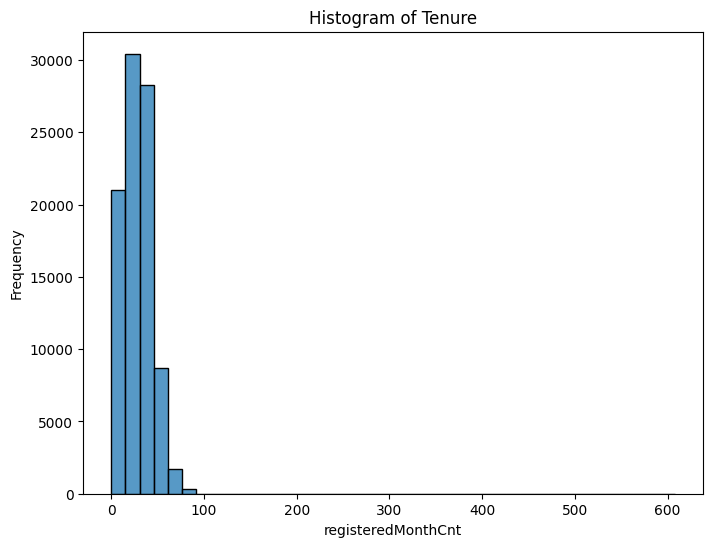

570      608
63996    608
65451    608
296       80
521       80
2008      80
2443      80
4224      80
5037      80
5342      80
5604      80
6270      80
6285      80
6746      80
7211      80
7947      80
8267      80
9401      80
10997     80
16000     80
Name: registeredMonthCnt, dtype: int64


In [9]:
plt.figure(figsize=(8,6))
sns.histplot(creator_dem['registeredMonthCnt'], bins = 40)
plt.title('Histogram of Tenure')
plt.ylabel('Frequency')
plt.show()

print(creator_dem['registeredMonthCnt'].nlargest(20))

The bulk of the creators are tenured around 10-50 months, this indicates that most of the creators have started recently, this is confirmed with the shape of the histogram which is right-skewed. In addition to that we have three creators with an exceptionally high tenure of 608 months, these are likely data errors and we shall replace them with the average tenure.

Next we will create a histogram with the number of profiles a creator follows.

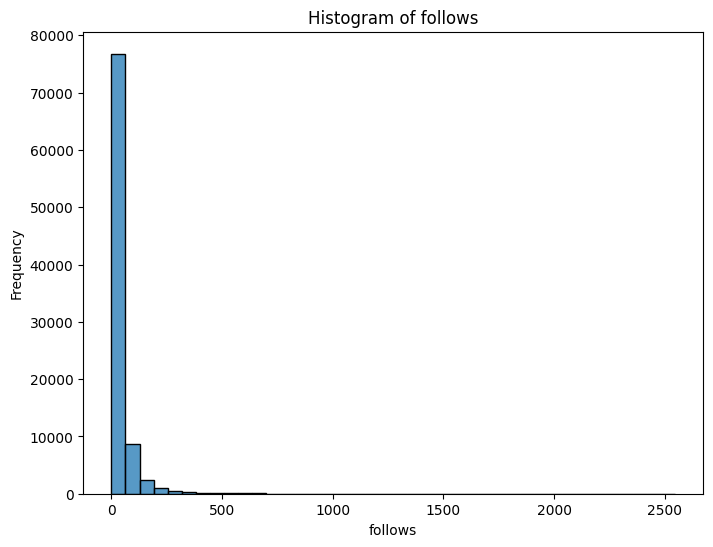

63905    2546
88412    2087
5197     2000
9765     2000
17256    2000
31158    2000
34396    2000
36220    2000
45185    2000
52384    2000
53510    2000
55887    2000
59880    2000
70545    2000
71286    2000
78993    2000
81249    2000
86703    2000
3749     1999
32667    1999
39049    1999
56162    1999
60171    1999
72534    1999
37989    1998
44201    1998
83206    1997
10875    1995
85619    1994
5559     1993
37229    1993
89460    1993
11546    1992
1656     1988
25806    1988
25473    1987
79565    1985
72066    1969
75738    1961
18217    1954
Name: follows, dtype: int64


In [11]:
plt.figure(figsize=(8,6))
sns.histplot(creator_dem['follows'], bins = 40)
plt.title('Histogram of follows')
plt.ylabel('Frequency')
plt.show()
print(creator_dem['follows'].nlargest(40))

The histogram for `follows` is also highly right-skewed. Most creators follow very few accounts and most of the creators follow less than 100 profiles. A few creators have an exceptionally high follow count which may indicate creator with exceptional activity. There may be dummy profiles that are only used to artificially increase follower count for other creators or potentially bots to scrape the system for information. As there are quite a few observations around the 2000 mark, we will not process or alter this variable for the time being. 

Now we will show the other perspective how many followers per profile we can expect. 

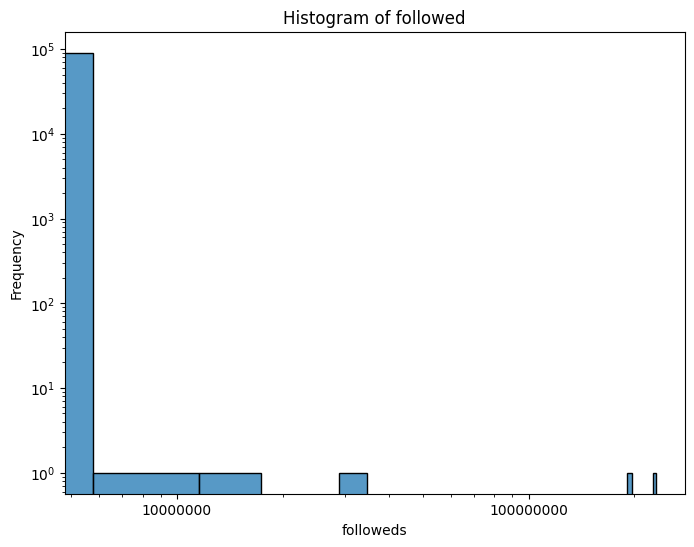

63996    230937644
81322    196201998
34396     31025272
37626     14530296
79169      6215979
7112       3574193
73208      3140959
18114      2442705
61073      2261065
3123       2251855
88793      2100089
32806      1848624
18476      1774502
33805      1728522
61193      1593359
14655      1545382
59822      1466574
71412      1323625
12075      1259953
84266      1188923
Name: followeds, dtype: int64


In [13]:
plt.figure(figsize=(8,6))
sns.histplot(creator_dem['followeds'], bins = 40)

plt.title('Histogram of followed')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.ticklabel_format(style='plain', axis = 'x')
plt.show()

print(creator_dem['followeds'].nlargest(20))

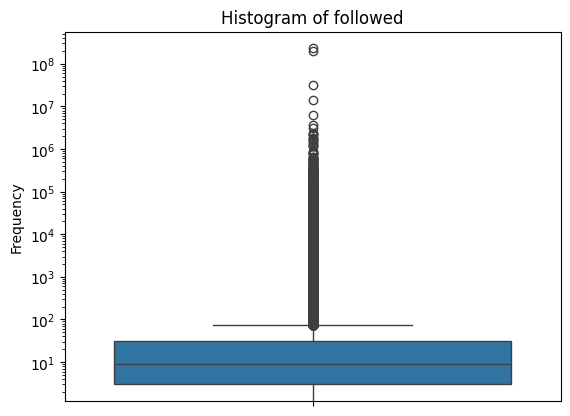

In [14]:
sns.boxplot(creator_dem['followeds'])
plt.title('Histogram of followed')
plt.ylabel('Frequency')
plt.yscale('log')

The histogram is shown on a log scale for the x- and y-axis, as the data could not be interpreted otherwise. To gain further insights, we produce a boxplot with a log-scale on the y-axis as well. We can see that the vast majority of the creators have very few followers around 0 followers. With the log scale we can see the extreme outliers with one reaching 2.3bn followers which is implausibly large, the same with some of the other top values with hundreds of millions of followers. Beyond the highest ranked follower counts we see a dramatic drop off with the top 20 values falling below the 10mn follower mark. 
The follower count should be cleaned should this variable be used in further analysis. Setting a threshold of 10mn followers could be a solution. 

Now we will show the distribution across categorical variables, starting with the creator types. For this we will create a column chart.

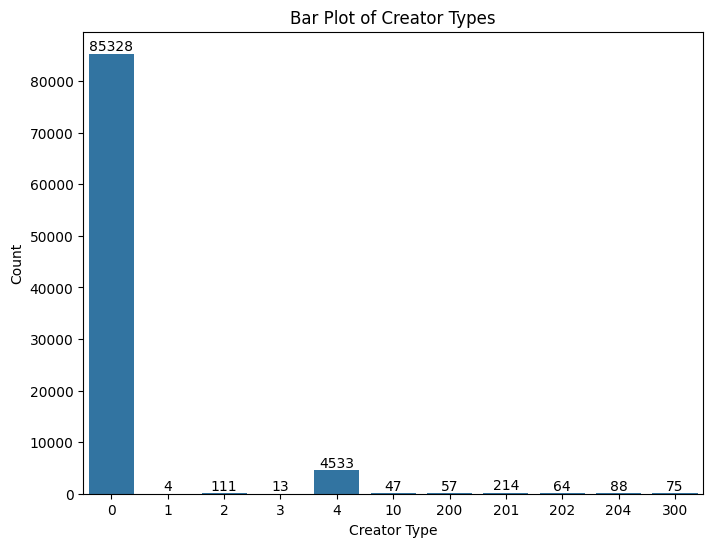

In [16]:
# Compute counts of each unique value in 'creatorType'
creator_counts = creator_dem['creatorType'].value_counts().reset_index()
creator_counts.columns = ['creatorType', 'count']

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=creator_counts, x='creatorType', y='count')

# Add labels at the end of the bars
for bar in ax.patches:
    # Get coordinates and add the labels accordingly
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 1,              
        int(bar.get_height()),             
        ha='center',                       
        va='bottom'                        
    )

# Add title and labels
plt.title('Bar Plot of Creator Types')
plt.xlabel('Creator Type')
plt.ylabel('Count')

# Show the plot
plt.show()

There appears to be two types of creator categories that are prevalent **type 0 & type 4**, though **type 0** heavily outweighs all the other types by far. As we do not have further information on the creator types, we will simply leave it as is for the time being and consider this when we use it in later stages of the project. 

Now we will analyze the creators by level in a similar manner as a bar chart. This measures the activity levels and represent creator engagement/intensity. This variable combines metrics such as time spent on the platform or frequency of interactions.

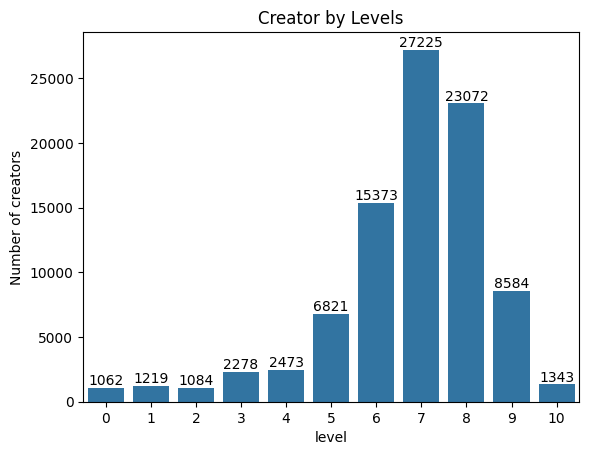

In [18]:
level_counts = creator_dem['level'].value_counts().reset_index()
level_counts.columns = ['level', 'count']
ax_1 = sns.barplot(data = level_counts, x = 'level', y = 'count')

for bar in ax_1.patches:
    ax_1.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height() + 1,              # Y-coordinate (slightly above the bar)
        int(bar.get_height()),             # Text to display
        ha='center',                       # Horizontal alignment
        va='bottom'                        # Vertical alignment
    )

plt.title('Creator by Levels')
plt.ylabel('Number of creators')

plt.show()

We can see a skewness to the left, with the majority of creators are between level 6 and 8. The mid- to high-range levels are the most common ones, suggesting that most creators are moderately active. On the extreme low ends, we can see much smaller numbers of creators, hence very few engage minimally. The steep decline at level 8 further suggests that high levels of activity are less common. As we cannot identify any anomalies, these values can be left as if for further analysis. 

We now create a correlation matrix to investigate whether any of the numerical or ordinal features are positively or negatively correlated. 

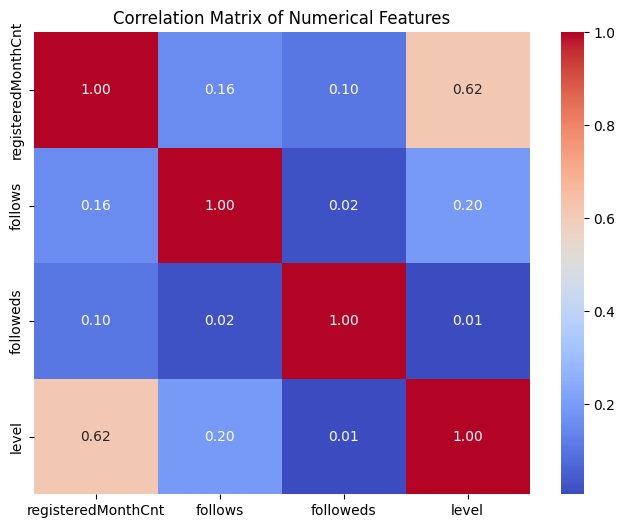

In [20]:
# Create a correlation plot between the numeric features
numerical_features = ['registeredMonthCnt', 'follows', 'followeds', 'level']

# Calculate correlation matrix
correlation_matrix_dem = creator_dem[numerical_features].corr()

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dem, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

This matrix shows the Pearson correlation coefficients with values ranging between -1 to 1, where -1 indicates perfect negative correlation and an increase in one variable would cause a decrease in the other. 1 indicates perfect positive correlation and means if one variable increases, the other increases as well. It is worth noting that Pearson measures the linear relationship and there may be non-linear relationships that are not captured here. 

The `registeredMonthCnt` has a moderatively positive correlation with `level` which indicates that creators with longer tenure tend to have a higher activity level, which is quite intuitive as more time on the platform provides more opportunities to engage. With `follows` and `followed` the correlation is very weak, indicating that creators with longer tenures do not guarantee more followers nor that they would follow more accounts than newer creators. 
`followeds` with `follows` have almost no correlation, indicating that following more accounts does not guarantee reciprocation. Further, there is a weak positive correlation between `follows` and `level` indicating that more active creators tend to follow more accounts, yet this correlation is very weak. 

Next, we will explore the user demographics table, we begin by loading the data and use the skim library to create a summary of the variables. 

In [22]:
user = pd.read_csv('user_demographics.csv')
print(user.info())

skim(user)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085533 entries, 0 to 2085532
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              object 
 1   province            object 
 2   age                 float64
 3   gender              object 
 4   registeredMonthCnt  float64
 5   followCnt           float64
 6   level               float64
dtypes: float64(4), object(3)
memory usage: 111.4+ MB
None


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2085533 │ │ float64     │ 4     │                                                         │
│ │ Number of columns │ 7       │ │ string      │ 3     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column              ┃ NA     ┃ NA %                 ┃ mean  ┃ sd    ┃ p0 ┃ p25 ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age                 │ 741491 │    35.55402863440665 │ 21.51 │ 3.756 │ 11 │  19 │  22 │  24 │   57 │  ▃▇▁   │  │
│ │ registeredMonthCnt  │    409 │ 0.019611293611752966 │ 23.79 │ 15.13 │  0 │  11 │  23 │  35 │  608 │   ▇    │  │
│ │ followCnt           │    409 │ 0.019611293611752966 │ 10.63 │ 26.15 │  0 │   3 │   5 │  10 │ 2465 │   ▇    │  │
│ │ level               │    409 │ 0.019611293611752966 │  5.67 │ 2.169 │  0 │   5 │   6 │   7 │   10 │ ▁▂▁▇▇▁ │  │
│ └─────────────────────┴────────┴──────────────────────┴───────┴───────┴────┴─────┴─────┴─────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA     ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ userId   │      0 │        0 │ PC       │ PCMCGCLC │ GCGCGCGC │ PCPCPCPC │     18.9 │         1 │  2085533 │  │
│ │          │        │          │          │ HCICPCLC │ GCMCICJC │ PCPCNCIC │          │           │          │  │
│ │          │        │          │          │ ICIC     │          │ KC       │          │           │          │  │
│ │ province │    409 │ 0.019611 │ an hui   │ hei long │ an hui   │ zhong    │     8.03 │         2 │  4236212 │  │
│ │          │        │ 29361175 │          │ jiang    │          │ qing     │          │           │          │  │
│ │          │        │     2966 │          │          │          │          │          │           │          │  │
│ │ gender   │ 741491 │ 35.55402 │ male     │ unknown  │ female   │ unknown  │     4.93 │      0.64 │  1344042 │  │
│ │          │        │ 86344066 │          │          │          │          │          │           │          │  │
│ │          │        │        5 │          │          │          │          │          │           │          │  │
│ └──────────┴────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The user demographics has 2,085,533 observations. We have in total 4 numerical columns and 3 categorical columns. In `age` and `gender`we have significant missing values of ~35.5%, while in `registeredMonthCnt`, `followCnt`, `province` &  `level`there are 409 missing rows which is negligible. 
With regards to `age`the average user is 21.51 years old, and there is a standard deviation of 3.76 and a range between 11 and 57 years old. Most of the users are between 19 and 24 years old, indicating that most of the users are primarly younger. 
The `registeredMonthCnt`which measures the users' tenure is ranges between very new users (0 months) and 608 months (~50 years) with the max likely being a data error. On average a user has been registered on the platform around 2 years with a standard deviation of 15.13 months or 1.25 years. 
The `followCnt`is the number of accouts which a user follows. On average a user follows 10.63 accounts with a standard deviation of 26.15, indicating a strong variability. Further, while some users follow no account, the maximum is 2,465 follows. 
With regards to `level` the mean is 5.67 on a 0-10 scale with a standard deviation of 2.17. The median of 6 tells us that the majority of users are moderately active and levels appear to be spread across the range quite evenly with a slight skewness towards higher levels. 

We will now further explore the user count per province to identify any potential anomalies or the like.

In [24]:
# we will confirm the count per province
province_counts = user['province'].value_counts().reset_index()
province_counts.columns = ['province', 'count']
province_counts

,province,count
0,guang dong,240651
1,jiang su,142783
2,zhe jiang,121859
3,he nan,121136
4,shan dong,119550
5,si chuan,106770
6,shan xi,105235
7,xin jiang,83413
8,hu nan,81366
9,bei jing,78900


The most active provinces appears to be Guandong, which has 240,651. This rank comes with quite a bit of a margin, with the second most active province, Jiangsu, having almost 100,000 users less. On the other extreme end is Macao and Taiwan with less than 1,000 users. With regards to data quality, we can confirm that all 34 province-level administrative divisions are represented in this table. 

Next we will replace the gender that are not filled with 'unknown' to be consistent with the creator-level data. With regards to age we will not perform any replacement, as this will significantly skew the data. Should we decide to perform any age-related analytics on the users, we can sample only the observations where age is available.

In [26]:
# Check for missing values
print(user.isnull().sum())

# Replace the missing gender values with 'unknown'
user['gender'] = user['gender'].fillna('unknown')
user['gender'].value_counts()

userId                     0
province                 409
age                   741491
gender                741491
registeredMonthCnt       409
followCnt                409
level                    409
dtype: int64


gender
unknown    771810
male       736236
female     577487
Name: count, dtype: int64

age
11.0         2
12.0       760
13.0      5790
14.0     18418
15.0     41799
16.0     65212
17.0     84194
18.0    100269
19.0    111121
20.0    115724
21.0    122385
22.0    128959
23.0    133138
24.0    121625
25.0     98928
26.0     73400
27.0     49969
28.0     31301
29.0     18291
30.0     10591
31.0      5952
32.0      3144
33.0      1701
34.0       792
35.0       375
36.0       130
37.0        30
38.0         5
40.0         3
41.0         3
42.0         1
43.0         1
44.0         1
45.0         2
49.0         5
50.0         3
51.0         2
52.0         4
53.0         2
54.0         3
55.0         1
56.0         2
57.0         4
Name: count, dtype: int64


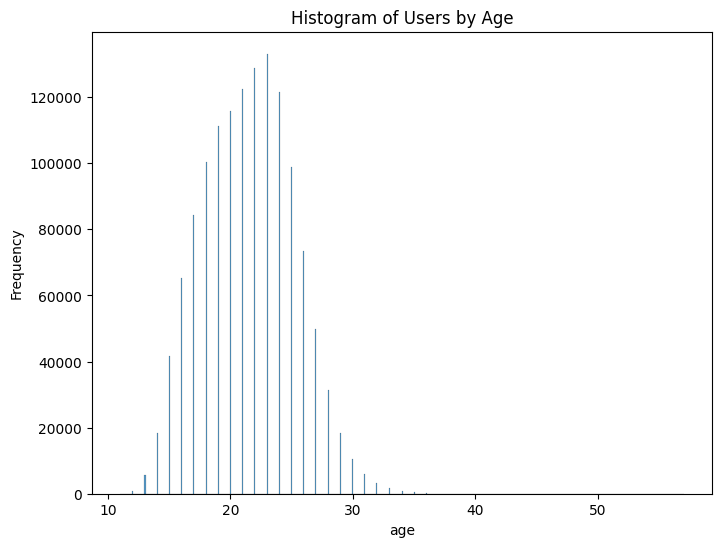

In [27]:
# Create an overview of the age of the users
print(user['age'].value_counts().sort_index())

plt.figure(figsize=(8,6))
sns.histplot(user['age'])
plt.title('Histogram of Users by Age')
plt.ylabel('Frequency')
plt.show()

As mentioned earlier, the age distribution is right skewed and the majority of users fall into younger brackets. The age range between 20-23 has the highest frequency and we see a sharp decline after 24 dropping far below the 100,000 mark at 26 years old. There might be a limited appeal for older users or a preference for younger audiences.

Next we will analyze the users tenure.

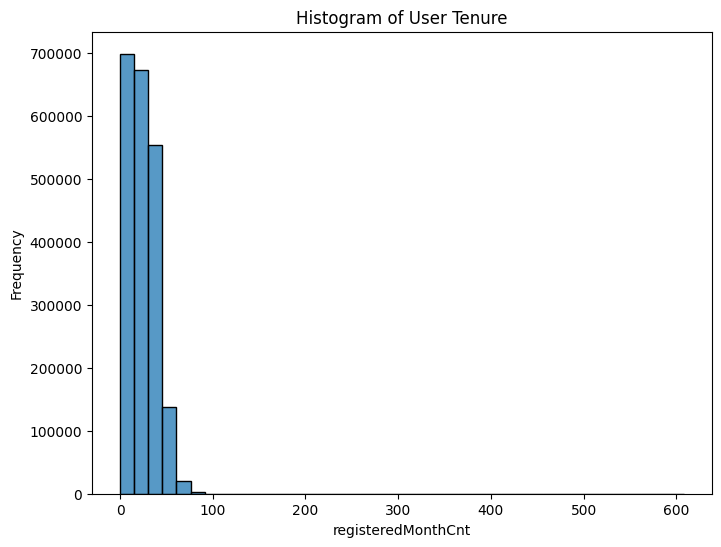

311114     608.0
369888     608.0
802785     608.0
804103     608.0
939027     608.0
1038912    608.0
1064091    608.0
1658913    608.0
1726581    608.0
1733552    608.0
1790153    608.0
1844447    608.0
2085021    608.0
0           80.0
4185        80.0
4187        80.0
4188        80.0
6286        80.0
6287        80.0
8375        80.0
Name: registeredMonthCnt, dtype: float64


In [29]:
plt.figure(figsize=(8,6))
sns.histplot(user['registeredMonthCnt'], bins = 40)
plt.title('Histogram of User Tenure')
plt.ylabel('Frequency')
plt.show()

print(user['registeredMonthCnt'].nlargest(20))

Similarly to the creator data, we can see the majority of users being registered on the platform below 50 months. The highest frequency appears to be between 0 and 20 months, indicating a large influx of new users. 
Also there are again extreme values with 608 months of tenure, which is likely a data errors since the platform itself is not 50 years old. The smaller cluster of 80 months appears to be correct as this aligns with the platform's launch period. 

We will now analyze the users by activity level.

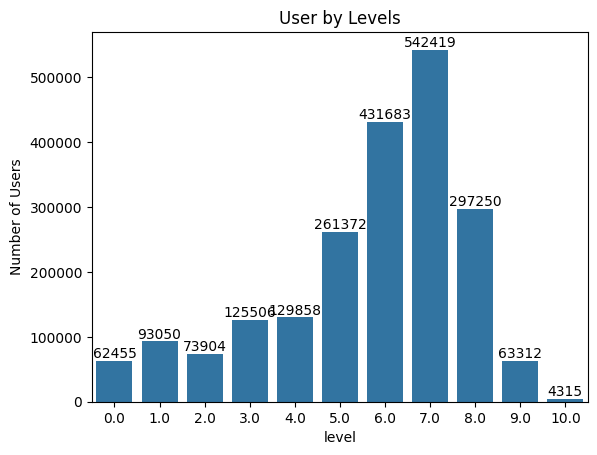

In [31]:
level_counts_user = user['level'].value_counts().reset_index()
level_counts_user.columns = ['level', 'count']
ax_3 = sns.barplot(data = level_counts_user, x = 'level', y = 'count')

for bar in ax_3.patches:
    ax_3.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 1,              
        int(bar.get_height()),             
        ha='center',                       
        va='bottom'                        
    )

plt.title('User by Levels')
plt.ylabel('Number of Users')

plt.show()

The users by level are left skewed indicating a moderate activity range between 5 and 7. This tells us that the majority of the users interacts quite regularly with the platform but do not exhibit extreme activity levels. Low activtiy levels are rare and reflect the plattforms ability to engage users effectively once they join. Finally there are a small user base who represent super users at level 9 and 10.

Next we will analyze the impression data, which represents the users interaction with the discovery subtab of the platform's interface. It tracks how the users interact with the contents card. This table is the largest by far and processing it may be challenging. We will first read the csv file and use the less strenious `describe()` function to generate summary statistics.

In [33]:
impression = pd.read_csv('impression_data-sampled.csv')
impression

C:\Users\patri\AppData\Local\Temp\ipykernel_24472\2631542553.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  impression = pd.read_csv('impression_data-sampled.csv')


,detailMlogInfoList,dt,impressPosition,impressTime,isClick,isComment,isIntoPersonalHomepage,isShare,isViewComment,isLike,mlogId,mlogViewTime,userId
0,[],15,1,1573832905000,1,0,0,0,0,0,NCKCKCOCOCOCHC,6.02,KCMCJCNCHCHCLCHCNC
1,[],14,2,1573730765000,1,0,0,0,0,0,KCMCPCKCPCJCIC,18.21,PCGCHCOCOCGCMCGCGCHC
2,[],9,3,1573256551000,1,0,0,0,1,0,PCLCGCHCLCICLC,16.76,GCKCKCGCNCKCOCKC
3,[],23,57,1574449008000,1,0,0,0,0,0,NCPCICKCGCOCNC,0.00,MCLCICHCNCGCOCGCMC
4,[],22,1,1574431428000,1,0,1,0,0,0,KCPCMCPCJCOCOC,57.11,PCJCICMCJCOCOCOCNCJC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474316,NaN,3,47,1572789674000,1,0,0,0,0,0,PCGCNCKCGCJCIC,19.65,PCPCPCPCPCJCPCJCOC
5474317,NaN,21,2,1574338219000,0,0,0,0,0,0,MCJCLCLCGCNCKC,NaN,PCPCPCPCPCKCJCNCHC
5474318,NaN,9,3,1573314379000,0,0,0,0,0,0,JCICPCOCNCNC,NaN,PCPCPCPCPCKCKCJCOC
5474319,NaN,9,3,1573314851000,0,0,0,0,0,0,NCMCGCICHCJCPC,NaN,PCPCPCPCPCKCKCJCOC


In [34]:
print(impression.info())
print(impression.isnull().sum())
impression.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474321 entries, 0 to 5474320
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   detailMlogInfoList      object 
 1   dt                      int64  
 2   impressPosition         int64  
 3   impressTime             int64  
 4   isClick                 int64  
 5   isComment               int64  
 6   isIntoPersonalHomepage  int64  
 7   isShare                 int64  
 8   isViewComment           int64  
 9   isLike                  int64  
 10  mlogId                  object 
 11  mlogViewTime            float64
 12  userId                  object 
dtypes: float64(1), int64(9), object(3)
memory usage: 543.0+ MB
None
detailMlogInfoList        5397321
dt                              0
impressPosition                 0
impressTime                     0
isClick                         0
isComment                       0
isIntoPersonalHomepage          0
isShare                  

,dt,impressPosition,impressTime,isClick,isComment,isIntoPersonalHomepage,isShare,isViewComment,isLike,mlogViewTime
count,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,5.474321e+06,292104.000000
mean,1.545616e+01,2.913756e+01,1.573841e+12,5.479712e-02,1.589238e-04,6.428194e-04,3.554779e-04,8.094520e-03,2.657133e-03,25.128254
std,8.636176e+00,1.557094e+02,7.468133e+08,2.275838e-01,1.260550e-02,2.534574e-02,1.885077e-02,8.960469e-02,5.147886e-02,69.029017
min,1.000000e+00,0.000000e+00,1.572538e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000e+00,2.000000e+00,1.573212e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.270000
50%,1.600000e+01,3.000000e+00,1.573839e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,16.270000
75%,2.300000e+01,1.900000e+01,1.574484e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31.880000
max,3.000000e+01,1.491400e+04,1.575130e+12,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,20147.980000


The table contains 57.7504 mn records and it summarizes the impressions, user actions and view time. 
Looking at the `dt` column, there is a range between 0 and 30 which indicates the day from the start of the month when the activity was sampled. The median is 15, which shows an even spread of impressions over the entire sample. 
The `impressTime` represents the exact time of when the impression was recorded and hence the statistical figures are not quite meaningful at this point. It might be useful if we would decide to analyze peak activity hours though. 
`impressPosition` shows the position of the Impression in the feed. Unsurprisingly, we can see that the majority of impressions occur in the top positions, where the item is more visible in the feed. The median is 3 and the 75th percentile is 8 confirming this statement. 
The `mlogViewTime` represents the time in seconds spent on an item. Here the typical viewtime is 2.54 seconds with the median being 1.63 seconds. This tells us that the majority of the impressions have very short viewing times and users would mostly scroll through their feeds at high speeds. We also have extreme values of 4118 seconds, which is over an hour of viewing time and negative values as well, which could be data anomalies that have to be cleaned up. It is also worth noting, that most observations do not have the view time data at all. If any analysis shall be done on the viewtime, then only a subset can be considered, yet it would still be sizable with over 2mn observations.  
With regards to the engagement data, the majority of users passively view content without liking, commenting or clicking on the artists page. The highest engagement activity is that users would click on the card itself, which is slightly below 5% of all impressions. Liking is the seond highest activity with just below 2.5% of all impressions end up in a like. Sharing, commenting or visiting the creators homepage is a rare occassion from the impression data, with all of them being far below 1%. 

We will now analyze the distribution of the `dt` column in more detail.

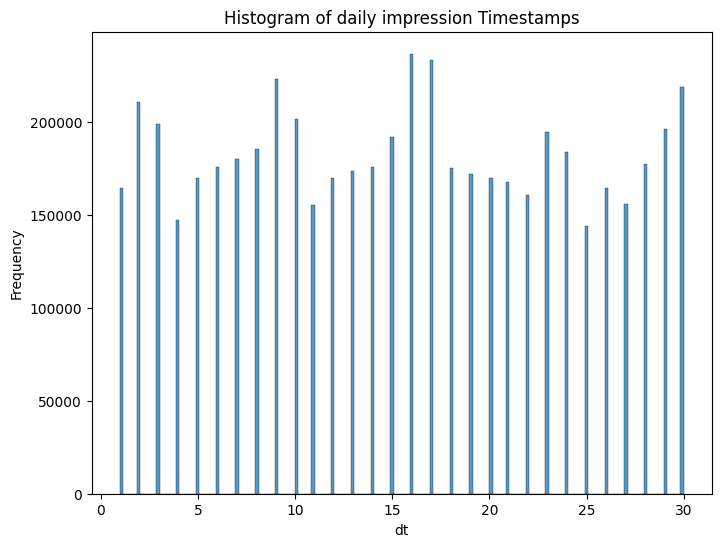

In [36]:
# Create histograms with dt impression
plt.figure(figsize=(8,6))
sns.histplot(impression['dt'])
plt.title('Histogram of daily impression Timestamps')
plt.ylabel('Frequency')
plt.show()

As the values of `dt` are not continuous and within a fixed range between 1 and 30, the addition of buckets is not required. We can see quite a uniform distribution with daily frequencies ranging between 1.5 and 2.5 million impressions per day. This nearly flat distribution can be interpreted as a consistent level of user engagement over the month, without a noticeable spike or drop. Though we can see a peak at day 16 or 30, which might indicate certain events or promotions that would happen towards the mid or the end of the month. 

Next we will look at the position of the impression in a feed.

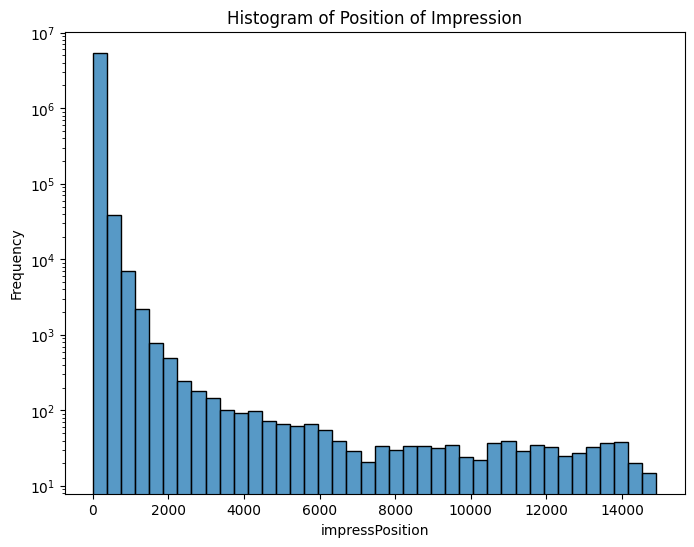

4396928    14914
4599950    14913
3311261    14912
3377052    14873
2716640    14857
4304976    14856
5402959    14812
3941944    14790
1895444    14752
356283     14749
369139     14679
2204518    14664
4546472    14655
1928724    14583
1221107    14556
1327911    14536
2892558    14518
2009270    14495
5402928    14478
1427011    14473
Name: impressPosition, dtype: int64


In [38]:
# Create histograms with impression 
plt.figure(figsize=(8,6))
sns.histplot(impression['impressPosition'], bins = 40)
plt.title('Histogram of Position of Impression')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

print(impression['impressPosition'].nlargest(20))

We utilize the log scale for the y-axis for improved readibility as the extreme cases towards the higher values (lower position on the feed) are proportionally a lot smaller than the lower values (top positions). The histogram displays a long-tailed right-skewed distribution and the majority of impressions occur at the top position at around 1000 in the feed. The frequency for the first few positions is exgtremely high which indicates that the top positions are far more frequently used to deliver content. This is also intuitive with the user behaviors, as the top content is more accessible. The largest values for `impressPositions` are 14,942 and they might occur due to specific platform recommendation system mechanics as opposed to actual users scrolling this low to view content. 
Should we use the `impressPositions` for analysis the handling of excessively high values needs to be taken into consideration, we might add a maximum cap at 8,000 for example. 

Next we will look at the user behavior data, which is represented as binary values per action and whether a user has performed them in the recorded instance. To do so we will create column charts to compare the proportions. 

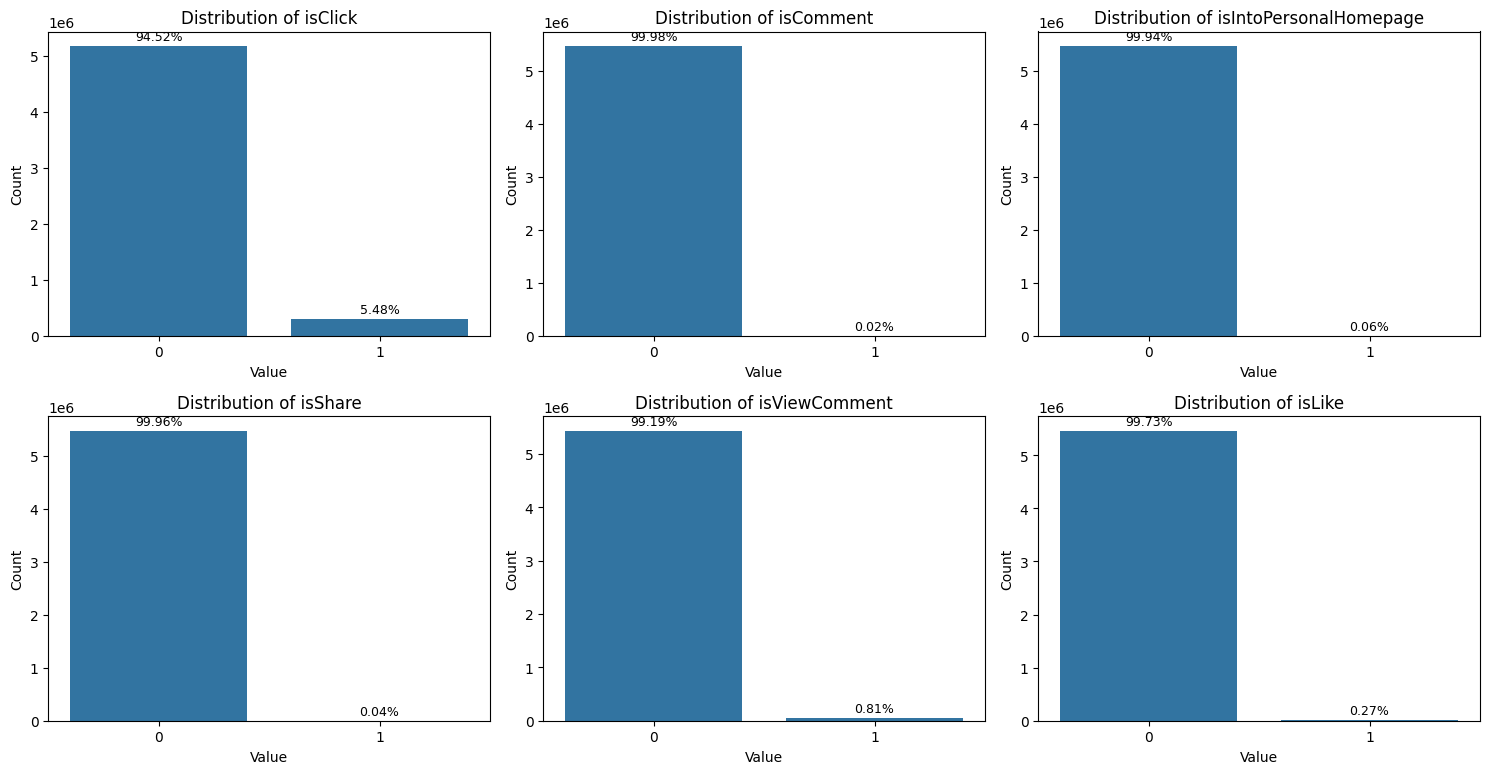

In [40]:
# List of binary columns
binary_columns = ["isClick", "isComment", "isIntoPersonalHomepage", "isShare", "isViewComment", "isLike"]

# Pre-aggregate counts for each binary column
binary_counts = {col: impression[col].value_counts().sort_index() for col in binary_columns}

# Subplots for visualizing distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(binary_columns):
    # Extract pre-aggregated counts
    counts = binary_counts[col]
    total = counts.sum()
    percentages = (counts / total * 100).round(2)  # Calculate percentages
    
    # Plot with pre-aggregated data
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    
    # Add percentage labels above the bars
    for idx, value in enumerate(counts.values):
        axes[i].text(idx, value + total * 0.01, f"{percentages[idx]}%", 
                     ha='center', va='bottom', fontsize=9, color='black')
    
    # Set titles and labels
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

As mentioned at the beginning of the `impression` analysis, the interaction metrics are mostly negative and most users view content without performing any actions as a result. The most likely action an artist can expect is the click through on the card, yet even this is only $\approx 5\%$, yet such a low click through rate is rather expected in content recommendation systems, where users are shown many impressions in a very short time. The action of clicking may be highly influenced by the visual appeal of a card. 
`isComment`represents whether a user has commented on a card. Here we see that comments are extremely rare at $0.01\%$. Users might have a high barrier to leaving a written feedback as opposed to simply liking a card. To get more comments, an artist might have to incentivize this behavior. 
`isIntoPersonalHomepage` shows whether a user visits the creator's profile. This is also uncommon and tells us that users are more interested in the content, rather than exploring the creator's details. It may be caused by a lack of contextual features or something that arouses the interst to further look intot he creator. 
`isShare` is also a very rare interaction, possibly caused by limited value to the user by sharing content. There might be a lack of perceived value in doing so, or the sharing itself is not convenient to do. 
`isLike` is more frequent than commenting or sharing but it is still very low. Possibly the users see no need to express appreciation towards the content they see. 
Overall, we can see a high interaction barrier, where users simply cannot be bothered to engage actively or maybe the action itself is not easily performed. 

Finally we will create a subset of the impression data and filter only those observations where the viewing time is not blank. 

In [42]:
# Filter the dataframe where we have data for the mlogViewTime
viewtime = impression[impression['mlogViewTime'].notna()]
# We will not use all the columns
viewtime = viewtime[['mlogViewTime', 'impressTime', 'isClick', 'isComment', 'isIntoPersonalHomepage', 'isShare', 'isViewComment']]
print(viewtime.describe())
viewtime

        mlogViewTime   impressTime        isClick      isComment  \
count  292104.000000  2.921040e+05  292104.000000  292104.000000   
mean       25.128254  1.573829e+12       0.996830       0.002903   
std        69.029017  7.593831e+08       0.056214       0.053802   
min         0.000000  1.572538e+12       0.000000       0.000000   
25%         6.270000  1.573191e+12       1.000000       0.000000   
50%        16.270000  1.573832e+12       1.000000       0.000000   
75%        31.880000  1.574490e+12       1.000000       0.000000   
max     20147.980000  1.575130e+12       1.000000       1.000000   

       isIntoPersonalHomepage        isShare  isViewComment  
count           292104.000000  292104.000000  292104.000000  
mean                 0.011342       0.006405       0.149604  
std                  0.105893       0.079776       0.356684  
min                  0.000000       0.000000       0.000000  
25%                  0.000000       0.000000       0.000000  
50%            

,mlogViewTime,impressTime,isClick,isComment,isIntoPersonalHomepage,isShare,isViewComment
0,6.02,1573832905000,1,0,0,0,0
1,18.21,1573730765000,1,0,0,0,0
2,16.76,1573256551000,1,0,0,0,1
3,0.00,1574449008000,1,0,0,0,0
4,57.11,1574431428000,1,0,1,0,0
...,...,...,...,...,...,...,...
5474233,7.84,1574866389000,1,0,0,0,0
5474236,13.93,1573448577000,1,0,0,0,1
5474257,28.31,1574918095000,1,0,0,0,0
5474270,91.66,1575106913000,1,0,0,0,0


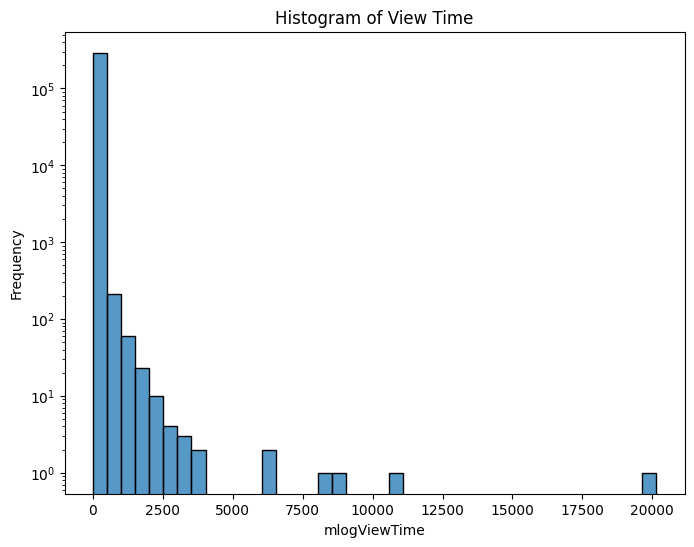

1808338    20147.98
153181     10927.31
441658      8749.88
4562897     8273.53
4322627     6377.28
5043842     6050.91
5340509     3658.69
2476771     3655.48
2903875     3503.98
3313972     3271.81
1827584     3182.99
3222034     2869.13
5454064     2850.57
1817219     2629.57
1960532     2579.29
972956      2462.83
3364007     2446.84
1805239     2408.25
2498670     2267.16
497333      2238.16
Name: mlogViewTime, dtype: float64
3        0.0
20       0.0
36       0.0
38       0.0
50       0.0
64       0.0
610      0.0
1219     0.0
1641     0.0
2402     0.0
2720     0.0
3358     0.0
3691     0.0
6682     0.0
11363    0.0
11669    0.0
13552    0.0
17482    0.0
17549    0.0
17830    0.0
Name: mlogViewTime, dtype: float64


In [43]:
# Create histograms with dt impression
plt.figure(figsize=(8,6))
sns.histplot(viewtime['mlogViewTime'], bins = 40)
plt.title('Histogram of View Time')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

print(viewtime['mlogViewTime'].nlargest(20))
print(viewtime['mlogViewTime'].nsmallest(20))

A significant proportion have very short view times, and a small fraction have exceptionally long view times. This suggests that users scroll though their feed quickly without engaging deeply with the majority of the cards that they view. While the majority of the view times fall below 10,000 seconds, there are still noticeable outliers on the higher end. This may be cases where the user left their device idle while having a card open for example. These outliers can distort the usage and we might want to add a upper limit of 10,000 seconds $\approx2.7hours$.

Next we will create a correlation matrix to view whether the view time would cause the user to perform any actions. 

mlogViewTime              1.000000
isViewComment             0.112533
isComment                 0.044486
isIntoPersonalHomepage    0.017570
isShare                   0.016617
impressTime               0.003873
isClick                  -0.008779
Name: mlogViewTime, dtype: float64


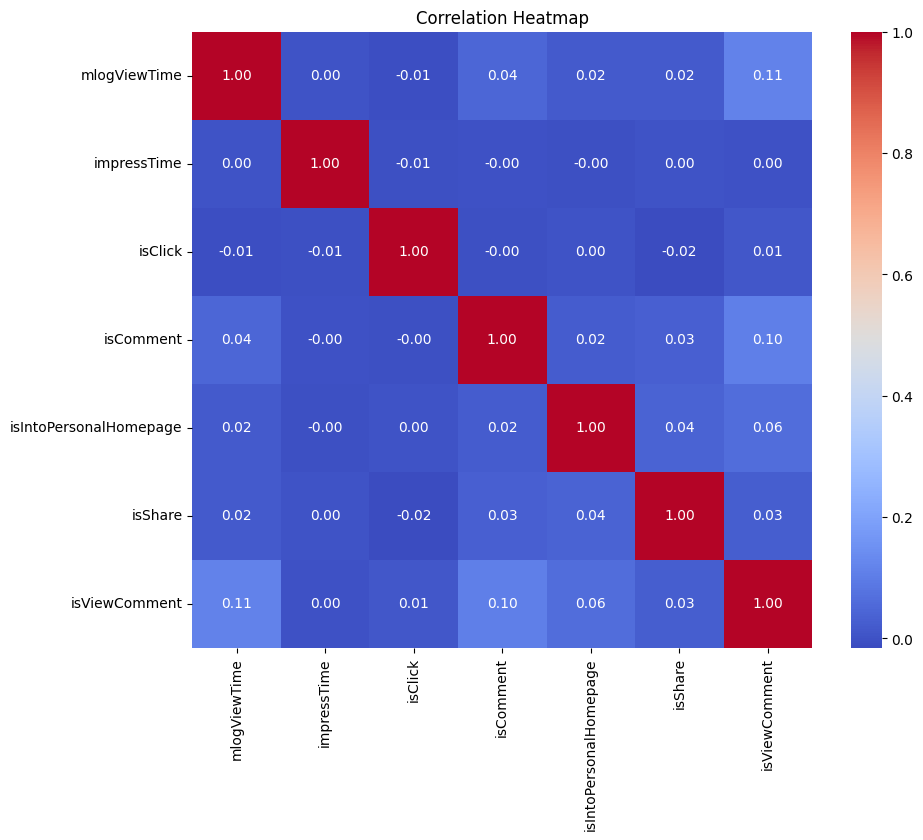

In [45]:
# Check for potential correlation between the View time and other values. 
correlation_matrix = viewtime.corr()
# Display correlation of mlogViewTime with other columns
correlations_with_viewtime = correlation_matrix['mlogViewTime'].sort_values(ascending=False)
print(correlations_with_viewtime)
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Most correlations are close to 0 and we can see largely independent user bahaviors. They might click, like or share for different reasons with limited overlap between these actions. The noticeable relationships are the view time and comment, where longer times are weakly linked to vieweing comments. Further, users are slightly more likely to engage with comments when they click on a card. 

## Mlog demographics & mlog Stats
Lastly we will explore the last two tables available in this dataset. 
The tables contain data about the content card. The card demographics table describes the information about each card, which is fixed over time such as background music, artist whose song is featured and when the card has been published. 
In addition to that there are daily statistics and actions generated by the users. The number of unique users that the card was shown per day, the number of users who have clicked on a card and how many likes it received per day is collected here for example.

In [47]:
card_dem = pd.read_csv('mlog_demographics.csv')
# omit values that are not relevant for EDA
card_dem_eda = card_dem[['songId', 'artistId', 'creatorId', 'publishTime', 'type']]
card_dem_eda

,songId,artistId,creatorId,publishTime,type
0,PCNCGCLCGCLCICHCLCIC,NCMCNCHCHCMCMCJC,LCHCHCICPCHCHCICKC,35,1
1,MCGCKCGCPCPCGCHC,ICKCOCJCIC,MCICJCPCOCOCLCKCPC,105,1
2,PCNCJCJCGCJCOCNCPCPC,PCMCOCLCICOCPCOC,PCNCLCKCGCMCPCOCOCMC,140,1
3,AFBHAHLH,AFBHAHLH,LCJCGCJCMCICHCLCHC,25,2
4,LCOCNCMCICGCMCKCIC,PCMCNCPCJCHC,PCKCICMCGCGCICMCKCPC,35,1
...,...,...,...,...,...
252950,AFBHAHLH,AFBHAHLH,MCOCPCOCHCJCJCGCPCJC,14,2
252951,LCPCICNCLCGCPCICKC,KCMCHCLCLC,PCICGCKCJCKCKCMCGCNC,162,1
252952,AFBHAHLH,AFBHAHLH,KCJCHCHCLCKCPCLCKC,16,2
252953,LCNCJCJCGCJCICICLC,PCOCKCHCPCJCHC,LCPCNCMCHCHCOCJCIC,174,1


In [48]:
card_dem

,mlogId,songId,artistId,creatorId,publishTime,type,contentId,talkId
0,NCGCJCNCPCPCOC,PCNCGCLCGCLCICHCLCIC,NCMCNCHCHCMCMCJC,LCHCHCICPCHCHCICKC,35,1,"5000,5006,5036",13003
1,MCLCOCOCKCOCIC,MCGCKCGCPCPCGCHC,ICKCOCJCIC,MCICJCPCOCOCLCKCPC,105,1,NaN,-1
2,PCMCMCICNCICOC,PCNCJCJCGCJCOCNCPCPC,PCMCOCLCICOCPCOC,PCNCLCKCGCMCPCOCOCMC,140,1,"5004,5028,5152",2005
3,KCOCHCPCPCHCPC,AFBHAHLH,AFBHAHLH,LCJCGCJCMCICHCLCHC,25,2,"5001,5010,5054",1307098
4,NCGCHCICPCPCKC,LCOCNCMCICGCMCKCIC,PCMCNCPCJCHC,PCKCICMCGCGCICMCKCPC,35,1,"5001,5012,5076",6005
...,...,...,...,...,...,...,...,...
252950,KCNCKCJCOCPCJC,AFBHAHLH,AFBHAHLH,MCOCPCOCHCJCJCGCPCJC,14,2,"5001,5011,5061",1585001
252951,HCICJCJCJCKC,LCPCICNCLCGCPCICKC,KCMCHCLCLC,PCICGCKCJCKCKCMCGCNC,162,1,"5002,5013,5077",41002
252952,KCMCHCOCNCOCJC,AFBHAHLH,AFBHAHLH,KCJCHCHCLCKCPCLCKC,16,2,"5000,5008,5044",1307098
252953,GCOCJCGCLCIC,LCNCJCJCGCJCICICLC,PCOCKCHCPCJCHC,LCPCNCMCHCHCOCJCIC,174,1,"5001,5011,5065",1336001


In [49]:
print(f"Unique songs: {len(card_dem_eda['songId'].unique())}")
print(f"Unique artists: {len(card_dem_eda['artistId'].unique())}")
print(f"Unique card creators: {len(card_dem_eda['creatorId'].unique())}")

Unique songs: 48428
Unique artists: 19405
Unique card creators: 90534


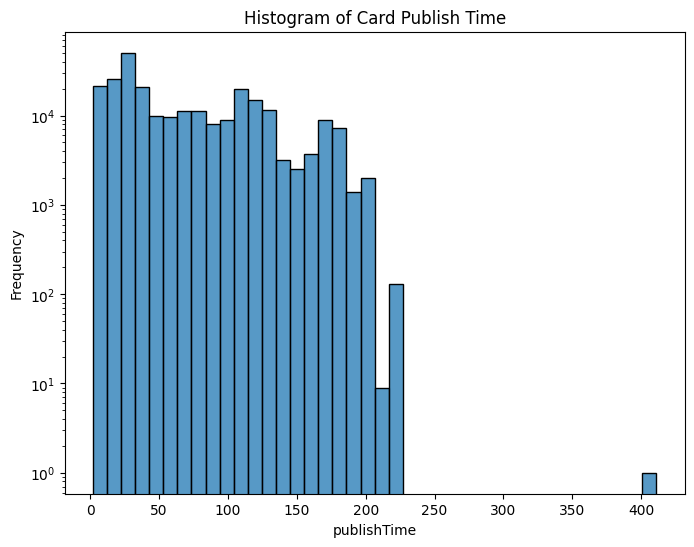

106952    411
2056      217
7292      217
8707      217
10821     217
11294     217
11484     217
13280     217
17298     217
21869     217
Name: publishTime, dtype: int64


In [50]:
# Create histograms with dt impression
plt.figure(figsize=(8,6))
sns.histplot(card_dem['publishTime'], bins = 40)
plt.title('Histogram of Card Publish Time')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()
print(card_dem['publishTime'].nlargest(10))

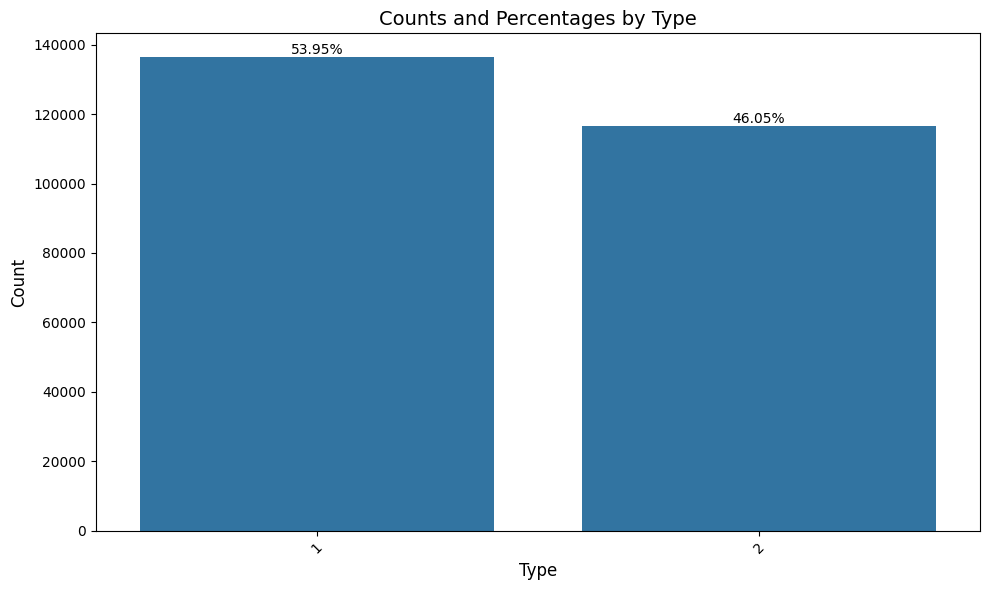

In [51]:
type_counts = card_dem_eda['type'].value_counts()
type_percentages = (type_counts / len(card_dem_eda) * 100).round(2)

# Create a DataFrame for easier plotting
type_data = pd.DataFrame({'count': type_counts, 'percentage': type_percentages})

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_data.index, y=type_data['count'])

# Add percentage labels above bars
for i, (count, percentage) in enumerate(zip(type_counts, type_percentages)):
    ax.text(i, count + 0.5, f'{percentage}%', ha='center', va='bottom', fontsize=10, color='black')

# Set chart title and labels
plt.title('Counts and Percentages by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

**Observations**

on Average the artists produce around 2.5 songs and each creator releases about 2.8 cards. In addition, there is an almost even split between image/music cards and cards with a music video.

Finally we will explore the card statistics

In [53]:
card_stats = pd.read_csv('mlog_stats.csv')
card_stats_eda = card_stats.iloc[:,1:]
card_stats_eda

,dt,userImprssionCount,userClickCount,userLikeCount,userCommentCount,userShareCount,userViewCommentCount,userIntoPersonalHomepageCount,userFollowCreatorCount
0,26,7907,71,1,0,0,3,0,0
1,30,1,0,0,0,0,0,0,0
2,11,169,15,1,0,0,0,0,0
3,14,324,27,2,1,0,7,0,0
4,17,154,10,2,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...
4191672,7,1,0,0,0,0,0,0,0
4191673,2,2,0,0,0,0,0,0,0
4191674,29,3,0,0,0,0,0,0,0
4191675,12,1,0,0,0,0,0,0,0


In [54]:
print(card_stats_eda.info())

skim(card_stats_eda)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191677 entries, 0 to 4191676
Data columns (total 9 columns):
 #   Column                         Dtype
---  ------                         -----
 0   dt                             int64
 1   userImprssionCount             int64
 2   userClickCount                 int64
 3   userLikeCount                  int64
 4   userCommentCount               int64
 5   userShareCount                 int64
 6   userViewCommentCount           int64
 7   userIntoPersonalHomepageCount  int64
 8   userFollowCreatorCount         int64
dtypes: int64(9)
memory usage: 287.8 MB
None


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 4191677 │ │ int64       │ 9     │                                                         │
│ │ Number of columns │ 9       │ └─────────────┴───────┘                                                         │
│ └───────────────────┴─────────┘                                                                                 │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ dt                       │   0 │     0 │        16 │   8.592 │   1 │    9 │   16 │   23 │      30 │ ▇▇▇▇▇▇ │  │
│ │ userImprssionCount       │   0 │     0 │     285.1 │    5712 │   1 │    2 │    8 │   45 │ 3165000 │   ▇    │  │
│ │ userClickCount           │   0 │     0 │     14.12 │   166.8 │   0 │    0 │    0 │    2 │   33430 │   ▇    │  │
│ │ userLikeCount            │   0 │     0 │    0.6609 │    7.48 │   0 │    0 │    0 │    0 │    1562 │   ▇    │  │
│ │ userCommentCount         │   0 │     0 │    0.0402 │   0.372 │   0 │    0 │    0 │    0 │     115 │   ▇    │  │
│ │ userShareCount           │   0 │     0 │   0.08067 │  0.9959 │   0 │    0 │    0 │    0 │     236 │   ▇    │  │
│ │ userViewCommentCount     │   0 │     0 │      2.08 │   36.42 │   0 │    0 │    0 │    0 │   12050 │   ▇    │  │
│ │ userIntoPersonalHomepage │   0 │     0 │    0.1682 │   4.364 │   0 │    0 │    0 │    0 │    2013 │   ▇    │  │
│ │ Count                    │     │       │           │         │     │      │      │      │         │        │  │
│ │ userFollowCreatorCount   │   0 │     0 │   0.04748 │   0.815 │   0 │    0 │    0 │    0 │     188 │   ▇    │  │
│ └──────────────────────────┴─────┴───────┴───────────┴─────────┴─────┴──────┴──────┴──────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [55]:
card_stats

,mlogId,dt,userImprssionCount,userClickCount,userLikeCount,userCommentCount,userShareCount,userViewCommentCount,userIntoPersonalHomepageCount,userFollowCreatorCount
0,KCNCLCICKCHCLC,26,7907,71,1,0,0,3,0,0
1,KCOCNCHCGCHCIC,30,1,0,0,0,0,0,0,0
2,NCKCMCKCNCNCOC,11,169,15,1,0,0,0,0,0
3,NCJCOCJCLCGCJC,14,324,27,2,1,0,7,0,0
4,NCGCOCKCOCOCKC,17,154,10,2,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...
4191672,NCGCGCKCKCICNC,7,1,0,0,0,0,0,0,0
4191673,PCJCKCKCOCPCNC,2,2,0,0,0,0,0,0,0
4191674,KCMCGCNCKCKCHC,29,3,0,0,0,0,0,0,0
4191675,NCJCGCNCJCMCLC,12,1,0,0,0,0,0,0,0


In [56]:
impression['long_view'] = impression['mlogViewTime'].apply(lambda x: 1 if x > 30 else 0)
impression

,detailMlogInfoList,dt,impressPosition,impressTime,isClick,isComment,isIntoPersonalHomepage,isShare,isViewComment,isLike,mlogId,mlogViewTime,userId,long_view
0,[],15,1,1573832905000,1,0,0,0,0,0,NCKCKCOCOCOCHC,6.02,KCMCJCNCHCHCLCHCNC,0
1,[],14,2,1573730765000,1,0,0,0,0,0,KCMCPCKCPCJCIC,18.21,PCGCHCOCOCGCMCGCGCHC,0
2,[],9,3,1573256551000,1,0,0,0,1,0,PCLCGCHCLCICLC,16.76,GCKCKCGCNCKCOCKC,0
3,[],23,57,1574449008000,1,0,0,0,0,0,NCPCICKCGCOCNC,0.00,MCLCICHCNCGCOCGCMC,0
4,[],22,1,1574431428000,1,0,1,0,0,0,KCPCMCPCJCOCOC,57.11,PCJCICMCJCOCOCOCNCJC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474316,NaN,3,47,1572789674000,1,0,0,0,0,0,PCGCNCKCGCJCIC,19.65,PCPCPCPCPCJCPCJCOC,0
5474317,NaN,21,2,1574338219000,0,0,0,0,0,0,MCJCLCLCGCNCKC,NaN,PCPCPCPCPCKCJCNCHC,0
5474318,NaN,9,3,1573314379000,0,0,0,0,0,0,JCICPCOCNCNC,NaN,PCPCPCPCPCKCKCJCOC,0
5474319,NaN,9,3,1573314851000,0,0,0,0,0,0,NCMCGCICHCJCPC,NaN,PCPCPCPCPCKCKCJCOC,0


# Next Steps: 

* What makes a user active? Figure out what content is more likely to be clicked and check what are the user characteristics of those who are active

* Impression data, does the position of the card cause a user to click on it? What other characteristics/stats do impressions have that are being clicked? certain artists? are the videos more liked or the ones with pictures and background music?
* 

## To be decided
* How do we interpret NaN's for mlogviewtime

First we aggregate the user activity from the impression table and then join it with the user table so we have a good overview of a user's activity level across different actions. 

In [58]:
# Group the impression data by 'userId' and calculate the aggregates
user_aggregates = impression.groupby('userId').agg(
    total_long_views=('long_view', 'sum'),      # Number of views exceeding 30 secs
    total_clicks=('isClick', 'sum'),            # Total number of clicks
    total_comments=('isComment', 'sum'),        # Total number of comments
    total_homepage_visits=('isIntoPersonalHomepage', 'sum'),  # Total homepage visits
    total_shares=('isShare', 'sum'),            # Total number of shares
    total_likes=('isLike', 'sum')               # Total number of likes
).reset_index()

# Merge the user demographics data with the aggregated impression data
combined_data = pd.merge(user, user_aggregates, on='userId', how='left')

# Replace NaN values with 0 for aggregated columns (in case some users have no impressions)
combined_data.fillna({
    'total_mlogViewTime': 0,
    'total_clicks': 0,
    'total_comments': 0,
    'total_homepage_visits': 0,
    'total_shares': 0,
    'total_likes': 0
}, inplace=True)

# Display the combined dataframe
print(combined_data.head())

             userId   province   age   gender  registeredMonthCnt  followCnt  \
0      MCPCHCMCHCIC     an hui  21.0     male                80.0       44.0   
1    NCOCKCPCMCGCGC   tian jin  23.0     male                76.0       59.0   
2  PCKCOCMCGCGCHCKC  shang hai   NaN  unknown                69.0       21.0   
3  MCICHCKCKCGCMCIC   bei jing   NaN  unknown                66.0       38.0   
4  NCJCHCPCNCICNCNC     hu bei  20.0     male                57.0       29.0   

   level  total_long_views  total_clicks  total_comments  \
0    9.0               0.0           0.0             0.0   
1    8.0               0.0           0.0             0.0   
2    7.0               0.0           0.0             0.0   
3   10.0               0.0           0.0             0.0   
4    8.0               NaN           0.0             0.0   

   total_homepage_visits  total_shares  total_likes  
0                    0.0           0.0          0.0  
1                    0.0           0.0          0.

In [59]:
combined_data.describe()

,age,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,total_homepage_visits,total_shares,total_likes
count,1.344042e+06,2.085124e+06,2.085124e+06,2.085124e+06,1.193902e+06,2.085533e+06,2.085533e+06,2.085533e+06,2.085533e+06,2.085533e+06
mean,2.150780e+01,2.379156e+01,1.063215e+01,5.669522e+00,6.844448e-02,1.438371e-01,4.171595e-04,1.687338e-03,9.330948e-04,6.974716e-03
std,3.756435e+00,1.513285e+01,2.615071e+01,2.169045e+00,4.848632e-01,1.123472e+00,5.259759e-02,4.682687e-02,7.630271e-02,1.434812e-01
min,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.900000e+01,1.100000e+01,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.200000e+01,2.300000e+01,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.400000e+01,3.500000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.700000e+01,6.080000e+02,2.465000e+03,1.000000e+01,3.900000e+01,2.090000e+02,6.900000e+01,1.400000e+01,8.700000e+01,3.200000e+01


To further enrich this, we will also check the preferences of a user towards the content they consume. Particularly, do they have a certain artist they like to follow, certain hashtags that would correspond to `talkId` or genres which corresponds to `contentId`. 



In [61]:
# Join impression data with card demographics
impression_with_card = pd.merge(impression, card_dem, on='mlogId', how='left')

# Group by userId to calculate the aggregated features
user_creator_metrics = impression_with_card.groupby('userId').agg(
    # Content Interaction Metrics
    total_creators=('creatorId', 'nunique'),  # Number of unique creators interacted with
    top_creator_engagement=('creatorId', lambda x: x.value_counts().max() if not x.empty else 0),  # Max interactions
    creator_diversity_index=('creatorId', lambda x: len(x.unique()) / len(x) if len(x) > 0 else 0),  # Diversity Index

    # Content-Level Metrics
    total_categories=('contentId', 'nunique'),  # Number of unique genres interacted with
    top_categories_engagement=('contentId', lambda x: x.value_counts().max() if not x.empty else 0),  # Max genre engagement

    # Music video vs image card
    music_video_count=('type', lambda x: (x == 2).sum()),  # Count of music videos
    image_card_count=('type', lambda x: (x == 1).sum())    # Count of image cards
).reset_index()

# Replace NaN values with 0 for interaction metrics
user_creator_metrics.fillna({
    'total_creators': 0,
    'top_creator_engagement': 0,
    'creator_diversity_index': 0,
    'total_categories': 0,
    'top_categories_engagement': 0,
    'music_video_count': 0,
    'image_card_count': 0
}, inplace=True)

# Display the aggregated metrics
print(user_creator_metrics.head())

             userId  total_creators  top_creator_engagement  \
0  GCGCGCGCGCMCICJC               1                     1.0   
1  GCGCGCGCJCKCKCOC               1                     1.0   
2  GCGCGCGCJCKCMCLC               1                     1.0   
3  GCGCGCGCJCNCICKC               1                     1.0   
4  GCGCGCGCKCGCHCGC               4                     1.0   

   creator_diversity_index  total_categories  top_categories_engagement  \
0                      1.0                 1                        1.0   
1                      1.0                 1                        1.0   
2                      1.0                 1                        1.0   
3                      1.0                 1                        1.0   
4                      1.0                 4                        1.0   

   music_video_count  image_card_count  
0                  0                 1  
1                  0                 1  
2                  1                 0  
3     

In [98]:
def compute_diversity_score(row):
    """
    Compute the overall diversity score for a single row of user data.
    
    Parameters:
    row (pd.Series): A row from the DataFrame containing the relevant columns.
    
    Returns:
    float: Diversity score for the given row.
    """
    # Extract required columns
    creator_diversity = row['creator_diversity_index']
    total_categories = row['total_categories']
    top_creator_engagement = row['top_creator_engagement']
    top_categories_engagement = row['top_categories_engagement']
    music_video_count = row['music_video_count']
    image_card_count = row['image_card_count']
    total_interactions = music_video_count + image_card_count

    # Handle edge cases for zero interactions
    if total_interactions == 0:
        return 0

    # Compute content balance
    content_balance = 1 - abs((music_video_count - image_card_count) / total_interactions)

    # Compute normalized engagement metrics
    normalized_top_creator = top_creator_engagement / total_interactions
    normalized_top_category = top_categories_engagement / total_interactions

    # Compute overall diversity score
    diversity_score = (
        0.3 * creator_diversity +
        0.3 * total_categories +
        0.2 * content_balance +
        0.1 * normalized_top_creator +
        0.1 * normalized_top_category
    )
    return diversity_score

# Apply the function row-wise
user_creator_metrics['diversity_score'] = user_creator_metrics.apply(compute_diversity_score, axis=1)

# Inspect the results
print(user_creator_metrics[['userId', 'diversity_score']].head())

             userId  diversity_score
0  GCGCGCGCGCMCICJC             0.80
1  GCGCGCGCJCKCKCOC             0.80
2  GCGCGCGCJCKCMCLC             0.80
3  GCGCGCGCJCNCICKC             0.80
4  GCGCGCGCKCGCHCGC             1.75


In [100]:
combined_data_metrics = pd.merge(combined_data, user_creator_metrics, on = 'userId', how = 'left')

combined_data_metrics

,userId,province,age,gender,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,...,total_shares,total_likes,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score
0,MCPCHCMCHCIC,an hui,21.0,male,80.0,44.0,9.0,0.0,0.0,0.0,...,0.0,0.0,14.0,2.0,0.933333,9.0,3.0,5.0,10.0,3.146667
1,NCOCKCPCMCGCGC,tian jin,23.0,male,76.0,59.0,8.0,0.0,0.0,0.0,...,0.0,0.0,17.0,2.0,0.894737,10.0,4.0,8.0,11.0,3.468421
2,PCKCOCMCGCGCHCKC,shang hai,NaN,unknown,69.0,21.0,7.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000
3,MCICHCKCKCGCMCIC,bei jing,NaN,unknown,66.0,38.0,10.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.000000,1.0,1.0,0.0,2.0,0.700000
4,NCJCHCPCNCICNCNC,hu bei,20.0,male,57.0,29.0,8.0,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085528,MCOCICOCLCNCMCNCMCNC,hai nan,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000
2085529,MCOCICOCLCJCMCMCJCKC,xin jiang,NaN,unknown,0.0,5.0,0.0,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2085530,MCOCICOCJCGCPCNCHCLC,guang xi,NaN,unknown,0.0,3.0,3.0,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2085531,MCOCICOCGCGCHCJCHCGC,jiang xi,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.000000,3.0,1.0,3.0,0.0,1.266667


In [102]:
combined_data_metrics.describe()

,age,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,total_homepage_visits,total_shares,total_likes,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score
count,1.344042e+06,2.085124e+06,2.085124e+06,2.085124e+06,1.193902e+06,2.085533e+06,2.085533e+06,2.085533e+06,2.085533e+06,2.085533e+06,1.193902e+06,1.193902e+06,1.193902e+06,1.193902e+06,1.193902e+06,1.193902e+06,1.193902e+06,1.193902e+06
mean,2.150780e+01,2.379156e+01,1.063215e+01,5.669522e+00,6.844448e-02,1.438371e-01,4.171595e-04,1.687338e-03,9.330948e-04,6.974716e-03,4.429498e+00,1.076489e+00,9.920322e-01,2.654810e+00,1.409184e+00,1.951597e+00,2.633311e+00,1.270672e+00
std,3.756435e+00,1.513285e+01,2.615071e+01,2.169045e+00,4.848632e-01,1.123472e+00,5.259759e-02,4.682687e-02,7.630271e-02,1.434812e-01,1.290470e+01,3.657194e-01,4.119692e-02,3.692281e+00,1.934684e+00,7.968785e+00,7.627943e+00,1.098069e+00
min,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.333333e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.900000e+01,1.100000e+01,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.000000e-01
50%,2.200000e+01,2.300000e+01,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e-01
75%,2.400000e+01,3.500000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.350000e+00
max,5.700000e+01,6.080000e+02,2.465000e+03,1.000000e+01,3.900000e+01,2.090000e+02,6.900000e+01,1.400000e+01,8.700000e+01,3.200000e+01,1.531000e+03,2.800000e+01,1.000000e+00,7.900000e+01,3.230000e+02,1.316000e+03,1.338000e+03,2.411477e+01


In [104]:
combined_data_metrics.columns

Index(['userId', 'province', 'age', 'gender', 'registeredMonthCnt',
       'followCnt', 'level', 'total_long_views', 'total_clicks',
       'total_comments', 'total_homepage_visits', 'total_shares',
       'total_likes', 'total_creators', 'top_creator_engagement',
       'creator_diversity_index', 'total_categories',
       'top_categories_engagement', 'music_video_count', 'image_card_count',
       'diversity_score'],
      dtype='object')

Next we will define an activity level score by weighing the different variables. 
We will look at the effort or cost that it takes to perform a certain action and will give that a higher weight. 
1. Shares requires the user to actively promote content which reflects a strong endorsement
2. Comments indicate a deeper engagement, commenting requires more effort than liking and is less anonymous
3. Liking signals interest or support and happens after one tab, hence it requires less effort.
4. Homepage visits are more exploratory and is more tied towards curiosity
5. Clicks represent an initial interest in the content while exploring
6. Viewtime is a more passive engagement

With this sequence we will assign weighs$w_i$ such that $\sum^m_{i=1}w_i = 1$. Further, as the mlogviewtime and the total clicks might be disproportionally large, we will normalize the values first, to have a fair weighing of the activity score. 

In [108]:
# List of features to normalize and include in activity score
features = ['total_shares', 'total_comments', 'total_likes', 
            'total_homepage_visits', 'total_clicks', 'total_long_views']

weights = [0.3, 0.25, 0.2, 0.1, 0.1, 0.05]

# Compute the activity score by applying weights directly
combined_data_metrics['activity_score'] = combined_data_metrics[features].dot(weights)

# Inspect the activity score
print(combined_data_metrics[['userId', 'activity_score']].head())

             userId  activity_score
0      MCPCHCMCHCIC             0.0
1    NCOCKCPCMCGCGC             0.0
2  PCKCOCMCGCGCHCKC             0.0
3  MCICHCKCKCGCMCIC             0.0
4  NCJCHCPCNCICNCNC             NaN


In [110]:
combined_data_metrics['activity_score'].describe()

count    1.193902e+06
mean     3.195061e-02
std      1.965187e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.560000e+01
Name: activity_score, dtype: float64

In [78]:
combined_data_metrics.to_csv('combined_user_metrics.csv')

In [112]:
combined_data_metrics

,userId,province,age,gender,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,...,total_likes,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score,activity_score
0,MCPCHCMCHCIC,an hui,21.0,male,80.0,44.0,9.0,0.0,0.0,0.0,...,0.0,14.0,2.0,0.933333,9.0,3.0,5.0,10.0,3.146667,0.0
1,NCOCKCPCMCGCGC,tian jin,23.0,male,76.0,59.0,8.0,0.0,0.0,0.0,...,0.0,17.0,2.0,0.894737,10.0,4.0,8.0,11.0,3.468421,0.0
2,PCKCOCMCGCGCHCKC,shang hai,NaN,unknown,69.0,21.0,7.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000,0.0
3,MCICHCKCKCGCMCIC,bei jing,NaN,unknown,66.0,38.0,10.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.000000,1.0,1.0,0.0,2.0,0.700000,0.0
4,NCJCHCPCNCICNCNC,hu bei,20.0,male,57.0,29.0,8.0,NaN,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085528,MCOCICOCLCNCMCNCMCNC,hai nan,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000,0.0
2085529,MCOCICOCLCJCMCMCJCKC,xin jiang,NaN,unknown,0.0,5.0,0.0,NaN,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2085530,MCOCICOCJCGCPCNCHCLC,guang xi,NaN,unknown,0.0,3.0,3.0,NaN,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2085531,MCOCICOCGCGCHCJCHCGC,jiang xi,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,3.0,1.0,1.000000,3.0,1.0,3.0,0.0,1.266667,0.0


In [114]:
inactive_users = combined_data_metrics[combined_data_metrics['activity_score'] == 0]
active_users = combined_data_metrics[combined_data_metrics['activity_score'] > 0]

active_users

,userId,province,age,gender,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,...,total_likes,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score,activity_score
40,JCNCGCGCMCKCMCLC,shan dong,26.0,male,55.0,9.0,7.0,0.0,1.0,0.0,...,0.0,5.0,1.0,1.000000,4.0,1.0,0.0,5.0,1.540000,0.10
70,HCICGCHCHCICNCGC,xin jiang,NaN,unknown,51.0,59.0,9.0,1.0,6.0,0.0,...,0.0,97.0,2.0,0.960396,25.0,13.0,20.0,81.0,7.882178,0.65
94,PCPCOCICICGCPCHCLC,guang dong,NaN,unknown,49.0,1.0,8.0,0.0,1.0,0.0,...,0.0,10.0,1.0,1.000000,8.0,2.0,5.0,5.0,2.930000,0.10
117,PCPCHCKCOCLCKCICOC,hu nan,20.0,female,48.0,1.0,6.0,1.0,1.0,0.0,...,0.0,27.0,1.0,1.000000,10.0,5.0,2.0,25.0,3.351852,0.15
122,PCMCPCPCNCICHCGCHC,an hui,22.0,male,48.0,6.0,8.0,1.0,1.0,0.0,...,0.0,3.0,1.0,1.000000,2.0,2.0,2.0,1.0,1.133333,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085471,MCOCKCPCNCOCKCPCNCLC,hu nan,NaN,unknown,1.0,3.0,2.0,0.0,1.0,0.0,...,0.0,2.0,1.0,1.000000,2.0,1.0,1.0,1.0,1.200000,0.20
2085474,MCOCKCPCHCOCJCLCHCIC,guang dong,NaN,unknown,1.0,4.0,3.0,1.0,2.0,0.0,...,0.0,5.0,1.0,1.000000,5.0,1.0,5.0,0.0,1.840000,0.25
2085475,MCOCKCMCHCHCJCNCPCHC,xin jiang,NaN,unknown,1.0,16.0,4.0,1.0,4.0,0.0,...,0.0,102.0,3.0,0.944444,29.0,10.0,29.0,79.0,9.102778,0.45
2085508,MCOCLCKCLCMCGCNCNCLC,he bei,NaN,unknown,0.0,4.0,0.0,0.0,1.0,0.0,...,0.0,2.0,1.0,1.000000,1.0,1.0,0.0,2.0,0.700000,0.10


C:\Users\patri\AppData\Local\Temp\ipykernel_24472\4163540820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_users['cluster'] = kmeans.fit_predict(clustering_data)
C:\Users\patri\AppData\Local\Temp\ipykernel_24472\4163540820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_users['cluster'] = active_users['cluster'] + 1


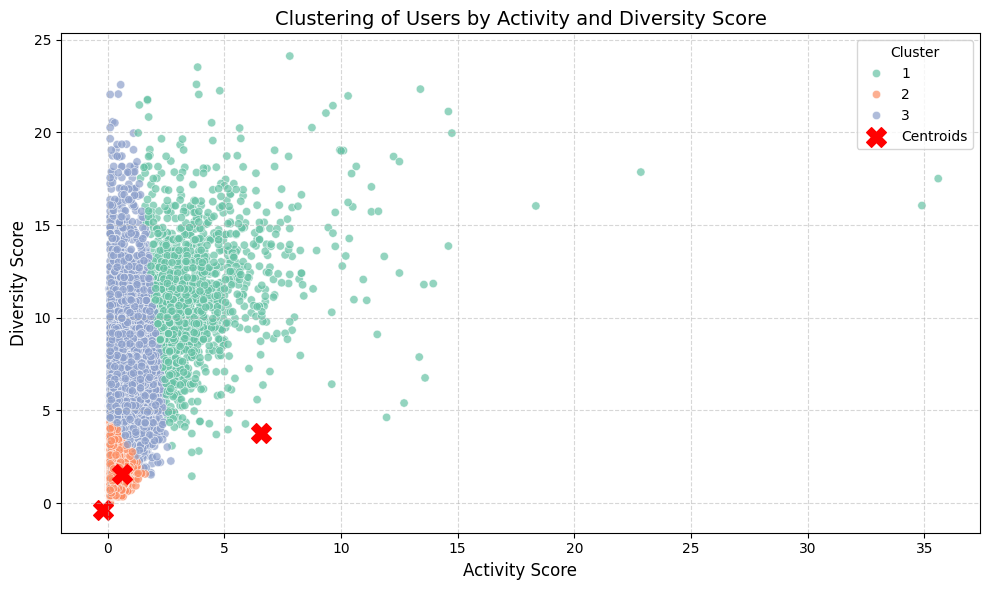

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data = scaler.fit_transform(active_users[['activity_score', 'diversity_score']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
active_users['cluster'] = kmeans.fit_predict(clustering_data)

# Increment cluster labels by 1 to start from 1
active_users['cluster'] = active_users['cluster'] + 1

# Add cluster centroids for visualization
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=active_users,
    x='activity_score',
    y='diversity_score',
    hue='cluster',
    palette='Set2',
    alpha=0.7
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

# Add titles and labels
plt.title('Clustering of Users by Activity and Diversity Score', fontsize=14)
plt.xlabel('Activity Score', fontsize=12)
plt.ylabel('Diversity Score', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

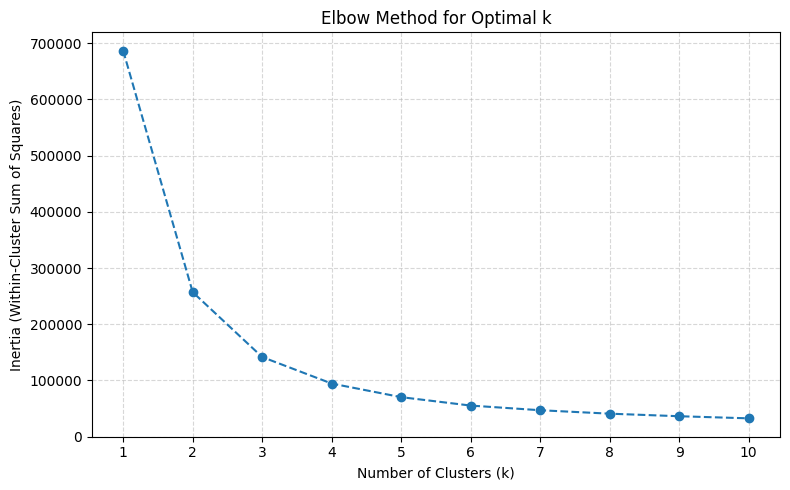

In [148]:
# Data for clustering (Activity and Diversity Scores)
clustering_data = active_users[['activity_score', 'diversity_score']]

# List to store the inertia (sum of squared distances to cluster centers)
inertia = []

# Test different numbers of clusters (k)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [138]:
active_users

,userId,province,age,gender,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,...,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score,activity_score,cluster
40,JCNCGCGCMCKCMCLC,shan dong,26.0,male,55.0,9.0,7.0,0.0,1.0,0.0,...,5.0,1.0,1.000000,4.0,1.0,0.0,5.0,1.540000,0.10,2
70,HCICGCHCHCICNCGC,xin jiang,NaN,unknown,51.0,59.0,9.0,1.0,6.0,0.0,...,97.0,2.0,0.960396,25.0,13.0,20.0,81.0,7.882178,0.65,1
94,PCPCOCICICGCPCHCLC,guang dong,NaN,unknown,49.0,1.0,8.0,0.0,1.0,0.0,...,10.0,1.0,1.000000,8.0,2.0,5.0,5.0,2.930000,0.10,2
117,PCPCHCKCOCLCKCICOC,hu nan,20.0,female,48.0,1.0,6.0,1.0,1.0,0.0,...,27.0,1.0,1.000000,10.0,5.0,2.0,25.0,3.351852,0.15,3
122,PCMCPCPCNCICHCGCHC,an hui,22.0,male,48.0,6.0,8.0,1.0,1.0,0.0,...,3.0,1.0,1.000000,2.0,2.0,2.0,1.0,1.133333,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085471,MCOCKCPCNCOCKCPCNCLC,hu nan,NaN,unknown,1.0,3.0,2.0,0.0,1.0,0.0,...,2.0,1.0,1.000000,2.0,1.0,1.0,1.0,1.200000,0.20,2
2085474,MCOCKCPCHCOCJCLCHCIC,guang dong,NaN,unknown,1.0,4.0,3.0,1.0,2.0,0.0,...,5.0,1.0,1.000000,5.0,1.0,5.0,0.0,1.840000,0.25,2
2085475,MCOCKCMCHCHCJCNCPCHC,xin jiang,NaN,unknown,1.0,16.0,4.0,1.0,4.0,0.0,...,102.0,3.0,0.944444,29.0,10.0,29.0,79.0,9.102778,0.45,1
2085508,MCOCLCKCLCMCGCNCNCLC,he bei,NaN,unknown,0.0,4.0,0.0,0.0,1.0,0.0,...,2.0,1.0,1.000000,1.0,1.0,0.0,2.0,0.700000,0.10,2


In [142]:
inactive_users['cluster'] = 0
inactive_users

C:\Users\patri\AppData\Local\Temp\ipykernel_24472\1232397312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_users['cluster'] = 0


,userId,province,age,gender,registeredMonthCnt,followCnt,level,total_long_views,total_clicks,total_comments,...,total_creators,top_creator_engagement,creator_diversity_index,total_categories,top_categories_engagement,music_video_count,image_card_count,diversity_score,activity_score,cluster
0,MCPCHCMCHCIC,an hui,21.0,male,80.0,44.0,9.0,0.0,0.0,0.0,...,14.0,2.0,0.933333,9.0,3.0,5.0,10.0,3.146667,0.0,0
1,NCOCKCPCMCGCGC,tian jin,23.0,male,76.0,59.0,8.0,0.0,0.0,0.0,...,17.0,2.0,0.894737,10.0,4.0,8.0,11.0,3.468421,0.0,0
2,PCKCOCMCGCGCHCKC,shang hai,NaN,unknown,69.0,21.0,7.0,0.0,0.0,0.0,...,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000,0.0,0
3,MCICHCKCKCGCMCIC,bei jing,NaN,unknown,66.0,38.0,10.0,0.0,0.0,0.0,...,2.0,1.0,1.000000,1.0,1.0,0.0,2.0,0.700000,0.0,0
6,KCKCGCMCGCHCHCLC,fu jian,20.0,male,61.0,11.0,9.0,0.0,0.0,0.0,...,6.0,1.0,1.000000,3.0,2.0,3.0,3.0,1.450000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085526,MCOCICOCMCNCICPCOCOC,guang dong,NaN,unknown,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,0.800000,0.0,0
2085527,MCOCICOCKCMCNCJCGCOC,jiang xi,NaN,unknown,0.0,3.0,2.0,0.0,0.0,0.0,...,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000,0.0,0
2085528,MCOCICOCLCNCMCNCMCNC,hai nan,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.800000,0.0,0
2085531,MCOCICOCGCGCHCJCHCGC,jiang xi,NaN,unknown,0.0,3.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.000000,3.0,1.0,3.0,0.0,1.266667,0.0,0


In [152]:
full_sample = pd.concat([active_users, inactive_users], ignore_index = True)

print(full_sample['cluster'].value_counts())

cluster
0    1063470
2     106822
3      22098
1       1512
Name: count, dtype: int64


In [154]:
full_sample.to_csv('user_clusters.csv')